## Objective 


To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualizations
import re
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("appstore_games.csv") 
print("Total Records: " + str(data.count()[1]))
cdata=data

Total Records: 17007


## Cleaning of redundant data

In [2]:
#data cleaning of columns
cdata=cdata.drop(columns="URL")                      
cdata=cdata.drop(columns="Icon URL")
cdata=cdata.drop(columns="Subtitle")
cdata=cdata.drop(columns="ID")
cdata=cdata.drop(columns="Description")
cdata=cdata.drop(columns="Primary Genre")
#creating new column names to avoid syntax errors due to space
cdata.columns= ['Name','User_Rating','User_Rating_Count','Price','In_App_Purchase','Dev','Age_Rating','Languages','Size','Genre','Release_Date','Current_Version_date']
#converting size into MB
cdata['Size'] = round(cdata['Size']/1000000,1)

In [3]:
#introducing a new column on length of last updation till current date
from datetime import date
from datetime import datetime 
cdata['Current_Version_date']=pd.to_datetime(cdata['Current_Version_date'])
today = date.today()
d1 = today.strftime("%d/%m/%Y") 
d1=datetime.strptime(d1, '%d/%m/%Y')
cdata['Diff'] = d1-cdata['Current_Version_date']

In [4]:
#removing empty null values 
cdata=cdata[pd.notnull(cdata['User_Rating_Count'])]
#Drop games that has rating less than 200 user rating count
Low_Count=cdata[(cdata.User_Rating_Count < 200 ) & (cdata['Diff'] < pd.Timedelta('180 days'))].index
cdata.drop(Low_Count , inplace=True)
#setting null values to be zero
cdata.fillna({'In_App_Purchase' : 0} , inplace=True)

## Grouping of genres

In [5]:
Non_Main_Genre=cdata[~cdata.Genre.str.contains('Puzzle') & \
                           ~cdata.Genre.str.contains('Action') & \
                           ~cdata.Genre.str.contains('Family')& \
                           ~cdata.Genre.str.contains('Education')& \
                           ~cdata.Genre.str.contains('Family')& \
                           ~cdata.Genre.str.contains('Adventure')&\
                           ~cdata.Genre.str.contains('Board')&\
                           ~cdata.Genre.str.contains('Role')].index
cdata.drop(Non_Main_Genre , inplace=True)
           
cdata.loc[cdata['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
cdata.loc[cdata['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
cdata.loc[cdata['Genre'].str.contains('Action'),'Genre'] = 'Action'
cdata.loc[cdata['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
cdata.loc[cdata['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
cdata.loc[cdata['Genre'].str.contains('Family'),'Genre'] = 'Family'
cdata.loc[cdata['Genre'].str.contains('Education'),'Genre'] = 'Family'
cdata.head()

,Name,User_Rating,User_Rating_Count,Price,In_App_Purchase,Dev,Age_Rating,Languages,Size,Genre,Release_Date,Current_Version_date,Diff
0,Sudoku,4.0,3553.0,2.99,0,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.9,Puzzle,11/07/2008,2017-05-30,1065 days
1,Reversi,3.5,284.0,1.99,0,Kiss The Machine,4+,EN,12.3,Puzzle,11/07/2008,2018-05-17,713 days
2,Morocco,3.0,8376.0,0.00,0,Bayou Games,4+,EN,0.7,Puzzle,11/07/2008,2017-05-09,1086 days
3,Sudoku (Free),3.5,190394.0,0.00,0,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21.6,Puzzle,23/07/2008,2017-05-30,1065 days
4,Senet Deluxe,3.5,28.0,2.99,0,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34.7,Puzzle,18/07/2008,2018-07-22,647 days


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Game Size analysis

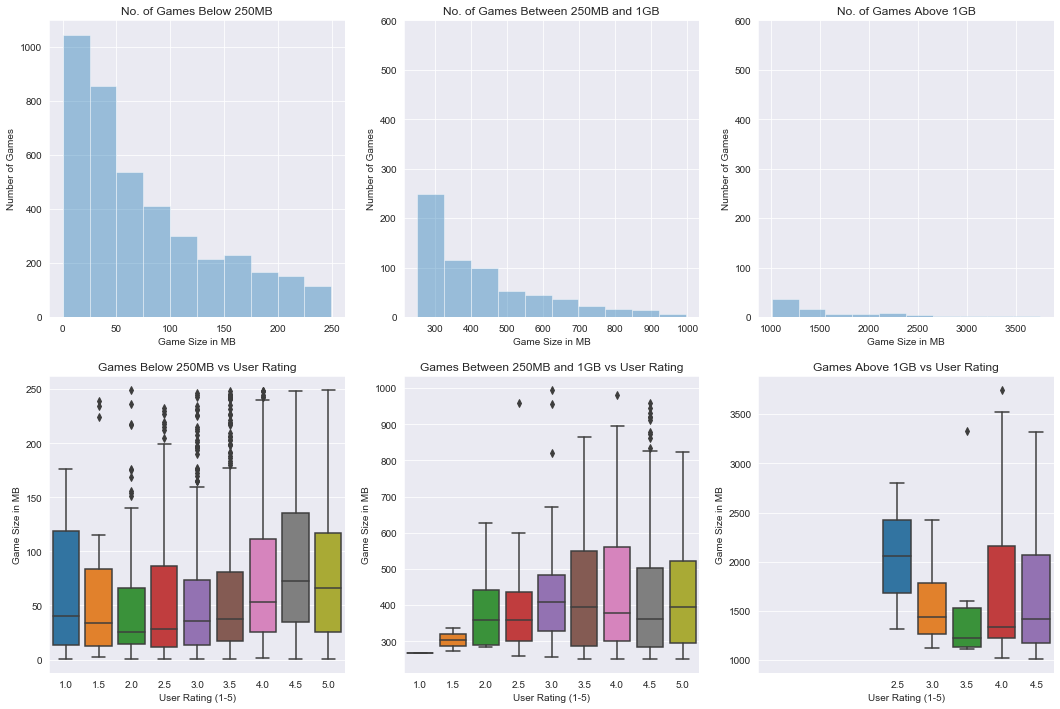

In [6]:
import matplotlib.pyplot as plt
Size_Less_250MB = cdata[cdata.Size <250]
Size_More_250MB = cdata[(cdata.Size >=250) & (cdata.Size <1000)]
Size_More_1GB = cdata[cdata.Size >=1000]


sns.set_style('darkgrid')
f, axes = plt.subplots (2,3, figsize=(18,12))



vis1 = sns.boxplot( data = Size_Less_250MB, x = 'User_Rating', y = 'Size',  ax=axes[1,0])
vis2 = sns.boxplot( data = Size_More_250MB, x = 'User_Rating', y = 'Size', ax=axes[1,1])
vis3 = sns.boxplot( data = Size_More_1GB, x = 'User_Rating', y = 'Size', ax=axes[1,2],)
vis4 = sns.distplot(Size_Less_250MB.Size, bins= 10, kde=False,ax=axes[0,0])
vis5 = sns.distplot(Size_More_250MB.Size, bins= 10, kde=False,ax=axes[0,1])
vis6 = sns.distplot(Size_More_1GB.Size, bins= 10, kde=False,ax=axes[0,2])

vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis2.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis3.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis4.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis5.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis6.set(xlabel='Game Size in MB',ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')
vis3.set(xlim=(-4, 4.5))

vis5.set(ylim=(0, 600))
vis6.set(ylim=(0, 600))

plt.ioff() 

### Plot representing Count of games and size factor

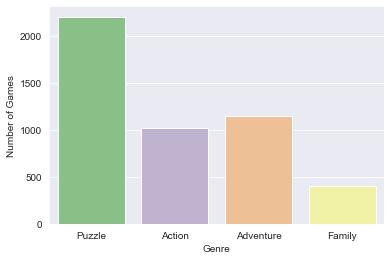

In [7]:
x=['Puzzle','Action','Adventure','Family']
y = [cdata.Genre[(cdata['Genre']=='Puzzle')].count(),cdata.Genre[(cdata['Genre']=='Action')].count(),\
     cdata.Genre[(cdata['Genre']=='Adventure')].count(),cdata.Genre[(cdata['Genre']=='Family')].count()]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Number of Games')
plt.ioff()


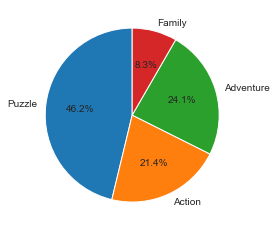

In [8]:

NG = [cdata.Genre[(cdata['Genre']=='Puzzle')].count(),cdata.Genre[(cdata['Genre']=='Action')].count(),\
     cdata.Genre[(cdata['Genre']=='Adventure')].count(),cdata.Genre[(cdata['Genre']=='Family')].count()]
G = ['Puzzle','Action','Adventure','Family']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.show()

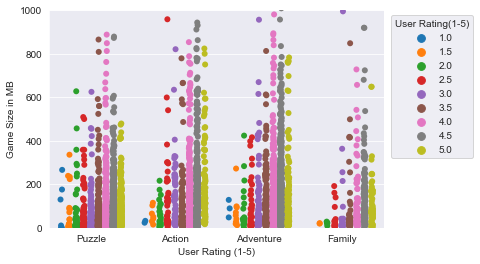

In [9]:
vis1= sns.stripplot(y='Size' , x='Genre', data=cdata,\
                hue='User_Rating',dodge=True, size=6)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.28, 1))

vis1.set(ylim=(0, 1000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
plt.ioff()

We can easily say that more than half of the games from these 4 genre gets a score of 4 and above, in which the majority focuses on size 500MB and below. With the exception of Adventure which still gets good rating up to 800MB. Family (and education) genre can be further looked at by developers to avoid the intense competition to other genres which are dominating the market

### Inference on Game Size 

It is known mobile game developers has to take mobile phone specifications into account, as bigger games takes more resources and might not run well in lower end mobile phones. However that will limit the amount of content and graphical quality of the game. This analysis intened to find out what are the trend of game size available as well as how good are they in terms of user rating.

1.From the visualization, we can see that most of the game are below 250MB In which to achieve score 4 and above it has to be 100MB and above.

2.Second column of the chart shows that good games (score >4) are between 300MB to 600MB, with the exception of score 3.5 games and a small portion of score 3.0 games.

3.A very small portion of games (less than 100 titles) are above 1GB, in which the minimum score for the game is 3-3.5. This might be due to the user sentiment who gives credit to the huge game content and possibly better game graphics. We can see that games that lies between 1.2GB and 1.7GB gets score >4.

Inference:
1. For simpler games, focus on size between  75MB to 150MB of contents
2. For more complex games, target between 300MB to 500MB of contents
3. Games above 1GB have good tendancy to land above 3.5 score and above, provided sufficient resource available to the developer
size in the appstore and actual game size may differ after installation, patching and downloading additional content from game serve

Inference:
1. Puzzle games are less saturated above 400MB to achieve score 4.0 and above
2. Action & Adventure Genre games are less saturated above 400MB to achieve score 4.0 and above
3. Family/Educational games has less competition overall
size in the appstore and actual game size may differ after installation, patching and downloading additional content from game server







---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Release date/ Update date factor

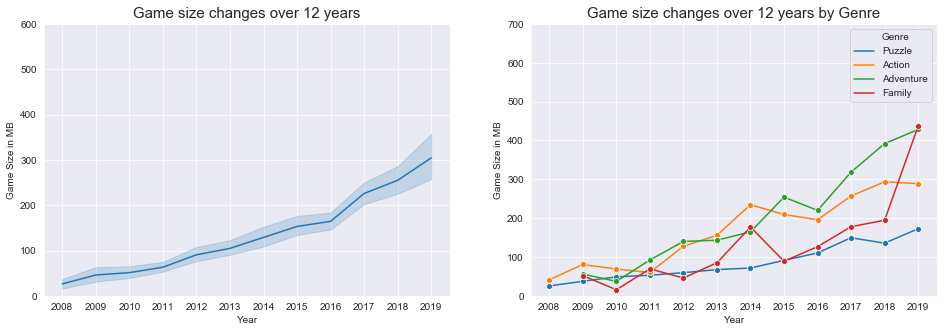

In [10]:
cdata['Year'] = cdata['Release_Date']
for i in (list(cdata.index.values)):
    cdata['Year'][i]=cdata['Year'][i][-4:]

g, axes = plt.subplots (1,2, figsize=(16,5))

vis1 = sns.lineplot(x=cdata.Year, y=cdata.Size, data=cdata, ax=axes[0])
vis1.set(ylim=(0, 600))
vis2 = sns.lineplot(x=cdata.Year, y=cdata.Size, hue=cdata.Genre, err_style=None, marker='o',ax=axes[1])
vis2.set(ylim=(0, 700))
plt.legend(bbox_to_anchor=(1, 1))

axes[0].set_title('Game size changes over 12 years',fontsize=15)
axes[1].set_title('Game size changes over 12 years by Genre',fontsize=15)

vis1.set(xlabel='Year',ylabel='Game Size in MB')
vis2.set(xlabel='Year',ylabel='Game Size in MB')

plt.ioff()  

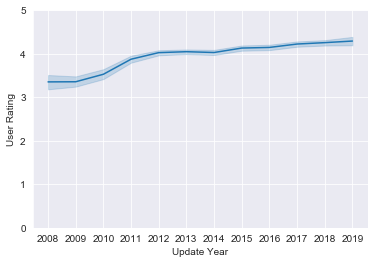

In [11]:
vis1= sns.lineplot(y='User_Rating' , x='Year', data=cdata)
vis1.set(ylim=(0,5))
vis1.set(xlabel='Update Year',ylabel='User Rating')
plt.ioff()

### Inference on Date Factor

Over the 12 years, the average Game Size sure has to grow to suit advancing mobile technology as well as accomodate thirstier players.

From the left graph we can see a almost Linear increase of game size except a spike from 2015-2016. We can also notice that the error margin has increased since year 2017- that means the size of game has a bigger range. We can deduce that smaller size games are still relatable but at the same time developers challenged the market with bigger size games (as big as 3.7GB per game)

The right graph shows the growth of game size per game Genre. It is noted that the Game Size fluctuates fronm year to year, but shows an overall trend of increasing, especially Action Genre which shows a constant growth in the last 5 years

We can see that updation factor helps to improve rating, recently updated games tend to have higher rating

Inference:
1. Game size are increasing roughly 50MB per year with Action/Adventure/Family games takes up bigger size Puzzle less size
2. Games which are recently updated are inclined to have more rating > 4.0





---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Game Price Factor

Text(0.5, 1.0, 'User Rating vs Price')

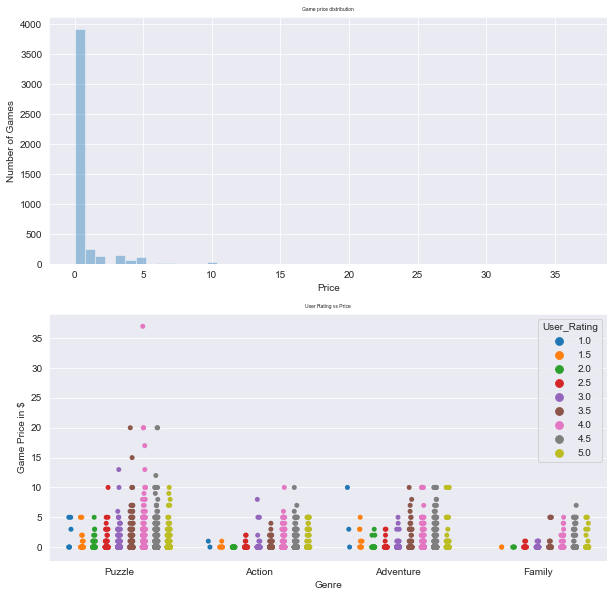

In [12]:
h, axes = plt.subplots (2,1, figsize=(10,10))

vis1 = sns.distplot(cdata.Price,kde=None,ax=axes[0])
vis2 = sns.stripplot(y=cdata.Price, x=cdata.Genre, data=cdata,ax=axes[1],hue=cdata.User_Rating, dodge=1)

vis1.set(xlabel='Price',ylabel='Number of Games')
vis2.set(xlabel='Genre',ylabel='Game Price in $')

axes[0].set_title('Game price distribution',fontsize=5)
axes[1].set_title('User Rating vs Price',fontsize=5)

## In-App Purchases Factor

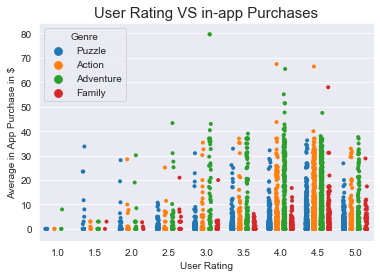

In [13]:
import statistics
cdata['In_App_Purchase'] = cdata['In_App_Purchase'].str.replace(',', '') 
cdata.In_App_Purchase=cdata.In_App_Purchase.fillna(0)
for i in (list(cdata.index.values)):
    if cdata.In_App_Purchase[i] ==0:
        cdata['In_App_Purchase'][i]=0.01
    elif cdata.In_App_Purchase[i] !=0:
        A=str.split(cdata.In_App_Purchase[i])
        A=[float(i) for i in A]
        cdata['In_App_Purchase'][i]=statistics.mean(A)
        
vis1= sns.stripplot(y=cdata.In_App_Purchase , x=cdata.User_Rating, data=cdata, hue=cdata.Genre, dodge=True, size=4)
vis1.set(xlabel='User Rating',ylabel='Average in App Purchase in $')
vis1.set_title('User Rating VS in-app Purchases',fontsize=15)
plt.ioff()

### Inference on Price Factor

Everyone loves free stuff, which explains the most significant amount of free and cheaper games (< $0.99 ) available in the store

The trend of user rating with respect to price becomes better as the game becomes pricier. We can tell that the game developers are confident and priced their games reasonably. Where games above dollar 8.99 always scores 4.0 and above. While games below $5.99 shows a rating range of 1.5 to 5.

The pricier the game gets, the higher the lower the In_App_Purchase items are. This is expected as low price and free games needs to sustain with some form of income.

Inference:
1. Almost 90 % of the developers focuses on games below dollar 1 and places In-App Purchase as their strategy for income
2. Paid Games tend to have better reviews espeicially those above dollar 8.99 that scores 4.0 User Rating
3. For 4.0 and above rating average in app purchase should be less than 40.00 dollar.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Age Rating Factor

In [14]:
cdata.Age_Rating.unique()

array(['4+', '9+', '17+', '12+'], dtype=object)

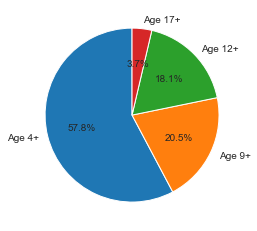

In [15]:
NAR = [cdata.Age_Rating[(cdata['Age_Rating']=='4+')].count(),cdata.Age_Rating[(cdata['Age_Rating']=='9+')].count(),\
     cdata.Age_Rating[(cdata['Age_Rating']=='12+')].count(),cdata.Age_Rating[(cdata['Age_Rating']=='17+')].count()]
AR = ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(NAR, labels=AR, startangle=90, autopct='%.1f%%')
plt.show()


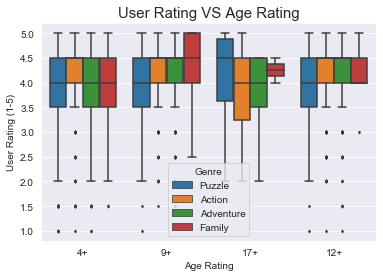

In [16]:
vis1 = sns.boxplot(x=cdata.Age_Rating, y=cdata.User_Rating, data=cdata, hue=cdata.Genre, dodge=True, fliersize=2)
vis1.set(xlabel='Age Rating',ylabel='User Rating (1-5)')
vis1.set_title('User Rating VS Age Rating',fontsize=15)
plt.ioff()

### Inference on Age Factor

Targetted Age Rating does not reflect the actual gamer's age, but plotting it against User Rating, we can see what does most of the consumer prefers: mature contents above 17+ rating

However, games rated 17+ makes up for least in the dataset of 2.9%

Inference:
-Consumers enjoy more matured content i.e games targetted for 17+ age and above

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Language Factor

In [17]:
kdata=cdata
kdata['Languages'] = kdata['Languages'].str.replace(',', '') 
kdata.fillna({'Languages' : 'OTH'} , inplace=True)

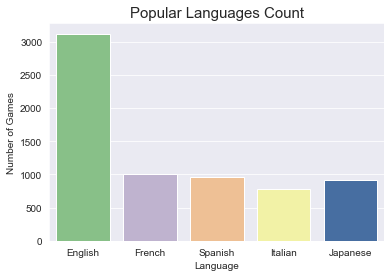

In [18]:
f=0;s=0;it=0;j=0
for i in (list(cdata.index.values)):
    if str(cdata['Languages'][i]).find('FR')>-1:
        f+=1
    if str(cdata['Languages'][i]).find('ES')>-1:
        s+=1
    if str(cdata['Languages'][i]).find('IT')>-1:
        it+=1
    if str(cdata['Languages'][i]).find('JA')>-1:
        j+=1
    if (kdata['Languages'][i]=='EN'):
        kdata['Languages'][i]='Only English'
    if (kdata['Languages'][i]!='EN'):
        if str(cdata['Languages'][i]).find('OTH')>-1:
            kdata['Languages'][i]='Not Applicable'
        elif  str(cdata['Languages'][i]).find('Only English')>-1:
            kdata['Languages'][i]='English'
        elif  str(cdata['Languages'][i]).find('EN')>-1:
            kdata['Languages'][i]='Other Languages\n + English'
        else:
            kdata['Languages'][i]='Other Languages'
        
x=['English','French','Spanish','Italian','Japanese']
y = [cdata.Languages[(cdata['Languages']=='English')].count(),f,s,it,j]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Language',ylabel='Number of Games')
vis1.set_title('Popular Languages Count',fontsize=15)
plt.ioff()

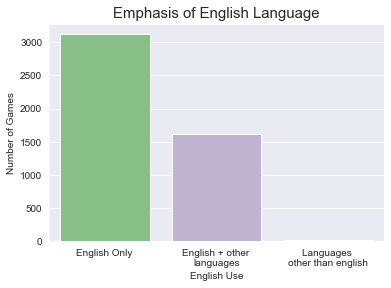

In [19]:
x1=['English Only ','English + other \nlanguages','Languages \nother than english']
y1 = [cdata.Languages[(cdata['Languages']=='English')].count(),cdata.Languages[(cdata['Languages']=='Other Languages\n + English')].count(),\
     cdata.Languages[(cdata['Languages']=='Other Languages')].count()]
vis2= sns.barplot(x1,y1,palette='Accent')
vis2.set(xlabel='English Use',ylabel='Number of Games')

vis2.set_title('Emphasis of English Language',fontsize=15)
plt.ioff()

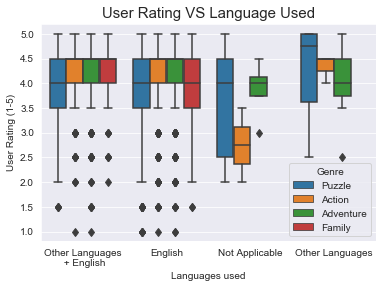

In [20]:
vis1 = sns.boxplot(x=cdata.Languages, y=cdata.User_Rating, data=cdata, hue=cdata.Genre, dodge=True,fliersize=6)
vis1.set(xlabel='Languages used',ylabel='User Rating (1-5)')
vis1.set_title('User Rating VS Language Used',fontsize=15)
plt.ioff()

### Inference on Language Factor

We can clearly see that it is absolutely preferred if we make an app in English Language.
Most of the apps are made in English only which includes 66.7 % of the games. 33 % games are in multiple languages which also includes English as one of the languages. Moreover only < 1% games are made without using English as one of the language

Inferences
1. It is preferred to use English as one of your apps supported language.
2. Puzzle games can be wriiten in other language than English yet they will gain more than 4.0 rating

# Result

1. You will be more successful if you make an action or adventure game
2. It should be preferably less than 600 MB
3. Game should be frequently updated
4. Game price should be less than 5 dollars preferably free.
5. Average In-app purchases should be less than 40.00 dollars
6. Age Rating should be 17+
7. App should contain English as one of its languages.